# PREDICTING AXL-MEDIATED CANCER PHENOTYPES

In [1]:
import pickle
import numpy as np
import pandas as pd
from scipy.stats import zscore
from sklearn.cross_decomposition import PLSRegression
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline
from msresist.parameter_tuning import DDMC_PLSR_tuning
from msresist.plsr import R2Y_across_components
from msresist.figures.figure1 import pca_dfs
from msresist.figures.figure3 import plotR2YQ2Y, plotActualVsPredicted, plotScoresLoadings, plotCenters, plotPCA, plotMotifs, plot_LassoCoef
from msresist.clustering import DDMC
import matplotlib.pyplot as plt
from msresist.pre_processing import preprocessing, y_pre, FixColumnLabels
from msresist.distances import DataFrameRipleysK
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from pomegranate import GeneralMixtureModel, NormalDistribution
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.1, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

ImportError: cannot import name 'MSclusPLSR_tuning' from 'msresist.parameter_tuning' (/home/marcc/resistance-MS/msresist/parameter_tuning.py)

$$ p_{xj} $$

In [2]:
# pd.set_option('display.max_colwidth', 1000)
# pd.set_option('display.max_rows', 1000000)
# pd.set_option('display.max_columns', 1000)

## Check MS Variability Across Replicates

In [3]:
# from msresist.figures.figure1 import plotVarReplicates

# fig, ax = plt.subplots(1, 2, figsize=(10, 6))
# plotVarReplicates(ax, preprocessing(Axlmuts_ErlAF154=True, rawdata=True))

## Import and Preprocess Signaling data

In [4]:
x_ = preprocessing(Axlmuts_ErlAF154=True, rawdata=True)
x_[x_["Gene"].str.endswith("MAPK1")]

NameError: name 'preprocessing' is not defined

### Phosphorylation measurements:

In [5]:
X = preprocessing(Axlmuts_ErlAF154=True, Vfilter=True, FCfilter=True, log2T=True, mc_row=True)

d = X.select_dtypes(include=['float64']).T
i = X.select_dtypes(include=['object'])

all_lines = ["WT", "KO", "KD", "KI", "Y634F", "Y643F", "Y698F", "Y726F", "Y750F ", "Y821F"] 
mut_lines = all_lines[1:]
g_lines = all_lines[2:]

d.index = all_lines

NameError: name 'preprocessing' is not defined

## Cell Phenotypes

### Cell Viability

In [6]:
cv1 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/CellViability/Phase/BR1_Phase.csv")
cv2 = pd.read_csv('msresist/data/Phenotypic_data/AXLmutants/CellViability/Phase/BR2_Phase.csv')
cv3 = pd.read_csv('msresist/data/Phenotypic_data/AXLmutants/CellViability/Phase/BR3_Phase.csv')
cv4 = pd.read_csv('msresist/data/Phenotypic_data/AXLmutants/CellViability/Phase/BR3_Phase.csv')

In [7]:
itp = 24
ftp = 96

cv = [cv1, cv2, cv3, cv4]
cv= FixColumnLabels(cv)

v_ut = y_pre(cv, "UT", ftp, "Viability", all_lines, itp=itp)
v_e = y_pre(cv, "-E", ftp, "Viability", all_lines, itp=itp)
v_ae = y_pre(cv, "A/E", ftp, "Viability", all_lines, itp=itp)

NameError: name 'FixColumnLabels' is not defined

In [8]:
v_ae

NameError: name 'v_ae' is not defined

### Cell Death

In [9]:
red1 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/CellViability/Red/BR1_RedCount.csv")
red2 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/CellViability/Red/BR2_RedCount.csv")
red3 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/CellViability/Red/BR3_RedCount.csv")
red4 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/CellViability/Red/BR4_RedCount.csv")
red4.columns = red3.columns

In [10]:
for jj in range(1, red1.columns.size):
    red1.iloc[: , jj] /= cv1.iloc[:, jj]
    red2.iloc[: , jj] /= cv2.iloc[:, jj]
    red3.iloc[: , jj] /= cv3.iloc[:, jj]
    red4.iloc[: , jj] /= cv4.iloc[:, jj]


cD = [red1, red2, red3, red4]
cD = FixColumnLabels(cD)
cd_ut = y_pre(cD, "UT", ftp, "Apoptosis", all_lines, itp=itp)
cd_e = y_pre(cD, "-E", ftp, "Apoptosis", all_lines, itp=itp)
cd_ae = y_pre(cD, "A/E", ftp, "Apoptosis", all_lines, itp=itp)

NameError: name 'FixColumnLabels' is not defined

In [11]:
cd_ae

NameError: name 'cd_ae' is not defined

### Cell Migration

In [12]:
r1 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR1_RWD.csv")
r2 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR2_RWD.csv")
r3 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR3_RWD.csv")
r4 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR4_RWD.csv")

In [13]:
ftp = 14
cm = [r1, r2, r3, r4]
m_ut = y_pre(cm, "UT", ftp, "Migration", all_lines)
m_e = y_pre(cm, " E", ftp, "Migration", all_lines)
m_ae = y_pre(cm, "A/E", ftp, "Migration", all_lines)

m_ut.index = v_ut.index
m_e.index = v_e.index
m_ae.index = v_ae.index

NameError: name 'y_pre' is not defined

In [14]:
m_ae

NameError: name 'm_ae' is not defined

### Clustering Effect

In [15]:
mutants = ['PC9', 'KO', 'KIN', 'KD', 'M4', 'M5', 'M7', 'M10', 'M11', 'M15']
treatments = ['ut', 'e', 'ae']
replicates = 6
radius = np.linspace(1, 14.67, 1)
folder = '48hrs'
c = DataFrameRipleysK(folder, mutants, treatments, replicates, radius).reset_index().set_index("Mutant")
c.columns = ["Treatment", "Island"]
c_ut = c[c["Treatment"] == "ut"]
c_ut = c_ut.reindex(list(mutants[:2]) + [mutants[3]] + [mutants[2]] + list(mutants[4:]))
c_ut.index = all_lines
c_ut = c_ut.reset_index()
c_ut["Treatment"] = "UT"

c_e = c[c["Treatment"] == "e"]
c_e = c_e.reindex(list(mutants[:2]) + [mutants[3]] + [mutants[2]] + list(mutants[4:]))
c_e.index = all_lines
c_e = c_e.reset_index()
c_e["Treatment"] = "E"

c_ae = c[c["Treatment"] == "ae"]
c_ae = c_ae.reindex(list(mutants[:2]) + [mutants[3]] + [mutants[2]] + list(mutants[4:]))
c_ae.index = all_lines
c_ae = c_ae.reset_index()
c_ae["Treatment"] = "A/E"

NameError: name 'DataFrameRipleysK' is not defined

In [16]:
c_ut

NameError: name 'c_ut' is not defined

In [17]:
c_e

NameError: name 'c_e' is not defined

In [18]:
c_ae

NameError: name 'c_ae' is not defined

### PCA Analysis

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [20]:
y_ae = pd.concat([v_ae, cd_ae["Apoptosis"], m_ae["Migration"], c_ae["Island"]], axis=1)
y_e =  pd.concat([v_e, cd_e["Apoptosis"], m_e["Migration"], c_e["Island"]], axis=1)
y_ut =  pd.concat([v_ut, cd_ut["Apoptosis"], m_ut["Migration"], c_ut["Island"]], axis=1)


y_c = pd.concat([y_ut, y_e, y_ae])
y_c.iloc[:, 2:] = StandardScaler().fit_transform(y_c.iloc[:, 2:])
y_c.head()

NameError: name 'v_ae' is not defined

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.75, hspace=None)
plotPCA(ax, y_c, 3, ["Lines", "Treatment"], "Phenotype", hue_scores="Lines", style_scores="Treatment", legendOut=True)

NameError: name 'plt' is not defined

#### Build Y Matrix with a Specific Treatment to Model:

With Axl-activating antibody:

In [22]:
y = y_ae.drop("Treatment", axis=1).set_index("Lines")

NameError: name 'y_ae' is not defined

# 0-. Final X and Y data sets to model

If dropping "WT", run:

In [23]:
# x = X.drop("PC9 A", axis=1)
# d = x.select_dtypes(include=['float64']).T
# i = x.select_dtypes(include=['object'])
# y = y.drop("WT")
# lines = mut_lines

In [24]:
# y = y.drop(["Migration"], axis=1)

Else:

In [25]:
lines = all_lines

NameError: name 'all_lines' is not defined

# 2.2-DUAL DATA-MOTIF CLUSTERING

In [26]:
from msresist.parameter_tuning import DDMC_PLSR_tuning

gs = DDMC_PLSR_tuning(d, i, y, "PAM250")

NameError: name 'd' is not defined

In [46]:
pam_model = DDMC(i, ncl=8, SeqWeight=0, distance_method="PAM250").fit(d, y)
print(pam_model.wins(d))
pamC = pam_model.transform()

PCA done
[1] Improvement: 2531.0551107564793	Time (s): 0.005359
[2] Improvement: 5.305142281031294e-08	Time (s): 0.005378
Total Improvement: 2531.0551108095306
Total Time (s): 0.0125
PCA done
[1] Improvement: 2546.9787045072476	Time (s): 0.003323
[2] Improvement: 2.8579876243384206e-08	Time (s): 0.003554
Total Improvement: 2546.9787045358275
Total Time (s): 0.0079
PCA done
[1] Improvement: 2269.4221048335226	Time (s): 0.003365
[2] Improvement: 4.090935263434403e-05	Time (s): 0.003686
[3] Improvement: 8.861878083621377e-05	Time (s): 0.003316
[4] Improvement: 0.0001937054218785761	Time (s): 0.003304
[5] Improvement: 0.0004234776121734285	Time (s): 0.003335
[6] Improvement: 0.0009257989773914233	Time (s): 0.00344
[7] Improvement: 0.00202372472884349	Time (s): 0.003343
[8] Improvement: 0.0044219254062909386	Time (s): 0.003337
[9] Improvement: 0.009651583461874225	Time (s): 0.003337
[10] Improvement: 0.021009813142114808	Time (s): 0.003355
[11] Improvement: 0.04544987902423259	Time (s): 0.0

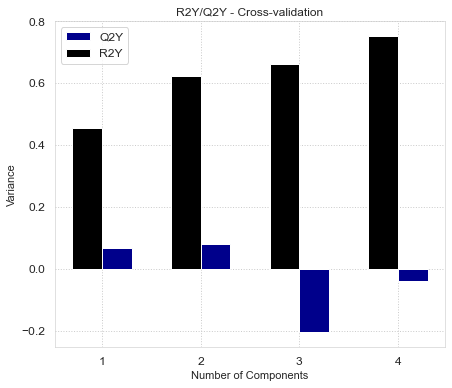

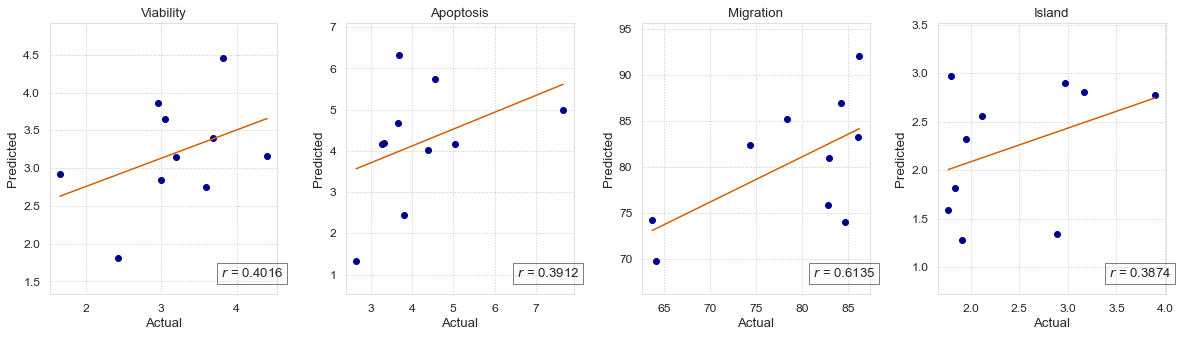

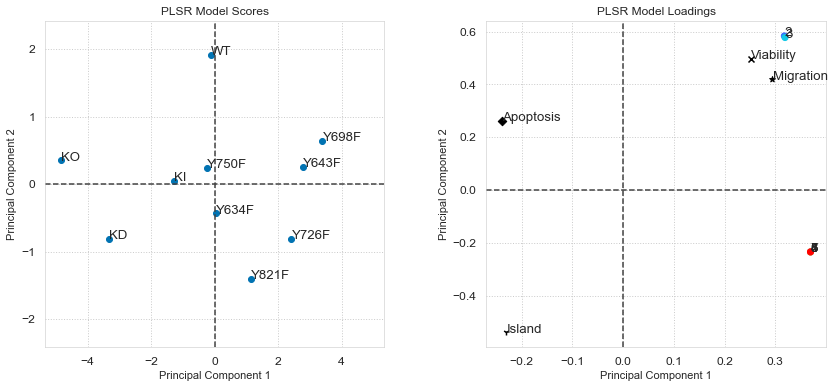

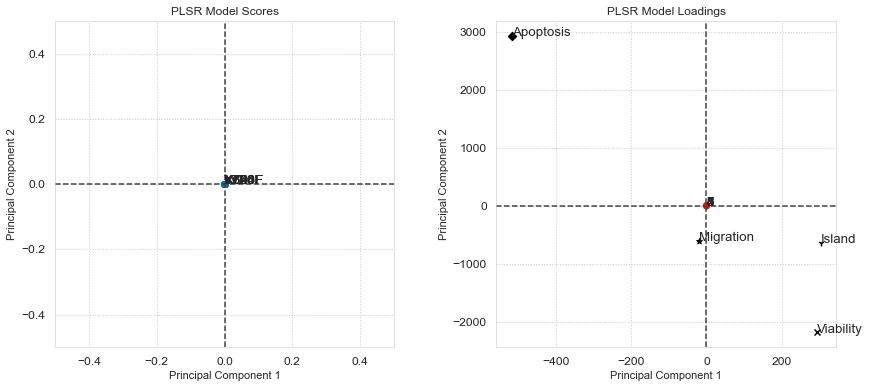

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(7,6))
size = pam_model.ncl + 1

plotR2YQ2Y(ax, PLSRegression(n_components=3, scale=True), pamC, y, 5)

fig, ax = plt.subplots(1, 4, figsize=(20,5))
fig.subplots_adjust(wspace=0.3, hspace=0.4)
pam_plsr = PLSRegression(n_components=4, scale=True)
plotActualVsPredicted(ax, pam_plsr, pamC, y, y_pred="cross-validation")

fig, ax = plt.subplots(1, 2, figsize=(14,6))
plotScoresLoadings(ax, pam_plsr.fit(pamC, y), pamC, y, pam_model.ncl, lines, pcX=1, pcY=2)
fig.subplots_adjust(wspace=0.3, hspace=0.4)

fig, ax = plt.subplots(1, 2, figsize=(14,6))
plotScoresLoadings(ax, pam_plsr.fit(pamC, y), pamC, y, pam_model.ncl, lines, pcX=3, pcY=4)
fig.subplots_adjust(wspace=0.3, hspace=0.4)

## 2.2.1 CLUSTER CENTERS AND MOTIFS
## PAM250

In [34]:
# Pickle
# with open('msresist/data/pickled_models/AXLmodel_PAM250_W2_5CL', 'wb') as m:
#     pickle.dump([pam_model], m)

# Unpickle
# with open('msresist/data/pickled_models/AXLmodel_PAM250_W2_5CL', 'rb') as f:
#     pam_model = pickle.load(f)[0]
# pamC = pam_model.transform()

FileNotFoundError: [Errno 2] No such file or directory: 'msresist/data/pickled_models/AXLmodel_PAM250_W2_5CL'

In [35]:
plotCenters(pamC, 2, 3, all_lines, sharey=False, figsize=(15, 10))

NameError: name 'pamC' is not defined

In [36]:
_, ax = plt.subplots(1, 3, figsize=(15, 6))
pssms = pam_model.pssms(PsP_background=True)
plotMotifs([pssms[0], pssms[3], pssms[4]], [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5], ax=ax, titles=["Cluster 1", "Cluster 4", "Cluster 5"])

NameError: name 'pam_model' is not defined

In [37]:
from msresist.figures.figure3 import plotUpstreamKinase_heatmap
_, ax = plt.subplots(1, 1, figsize=(15, 5))
plotUpstreamKinase_heatmap(pam_model, [1, 4, 5], ax)

NameError: name 'pam_model' is not defined

## 2.2.2 PREDICTING PHENOTYPES USING LINEAR REGRESSION MODELS
## PLSR
## Using different PLSR strategies:

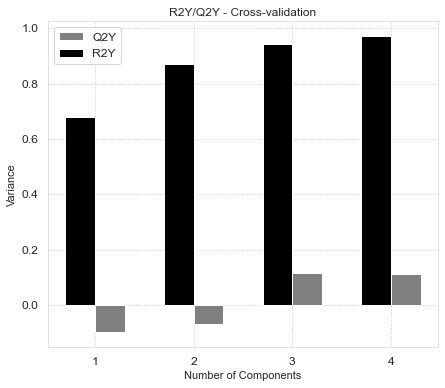

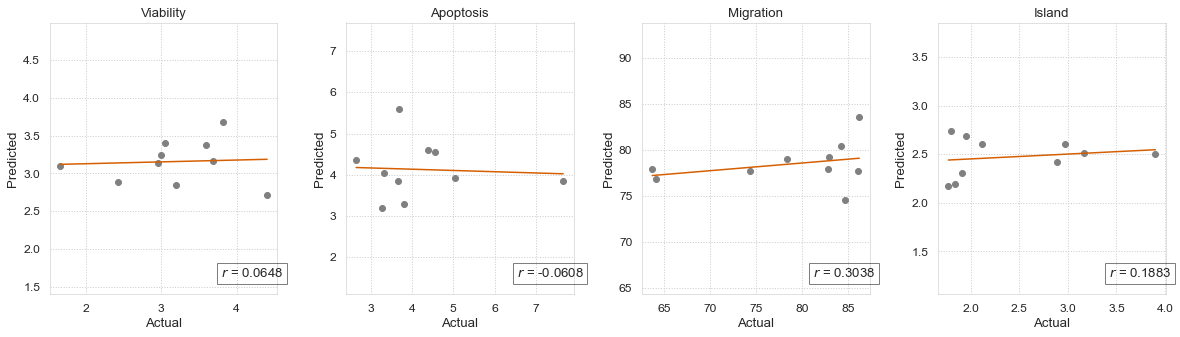

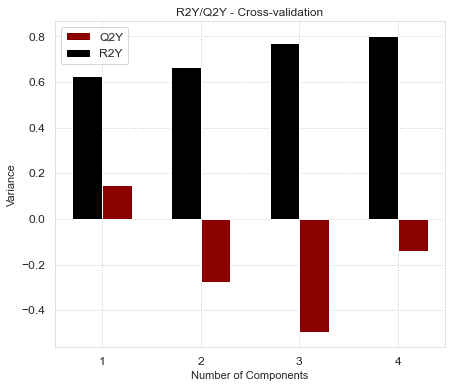

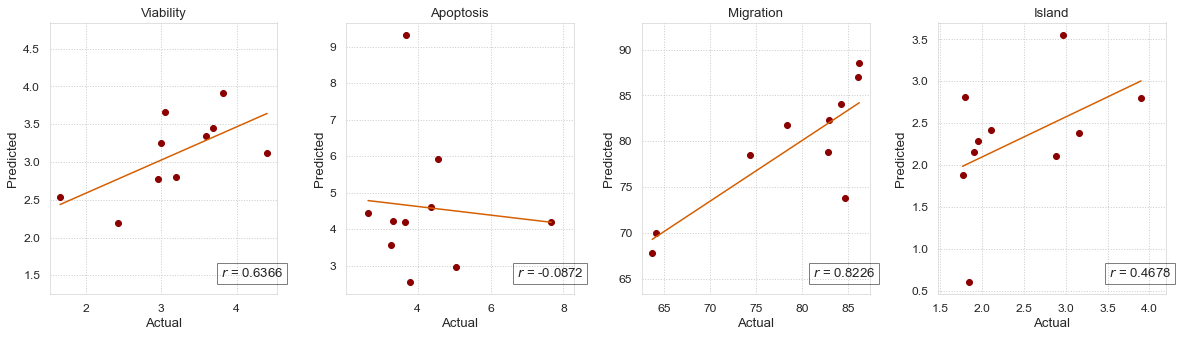

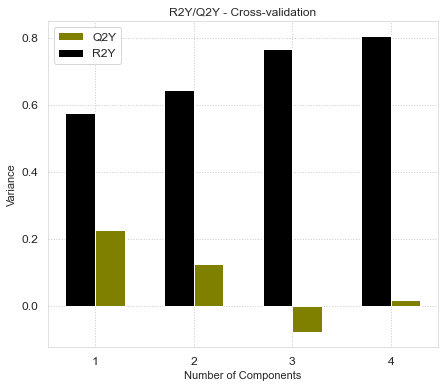

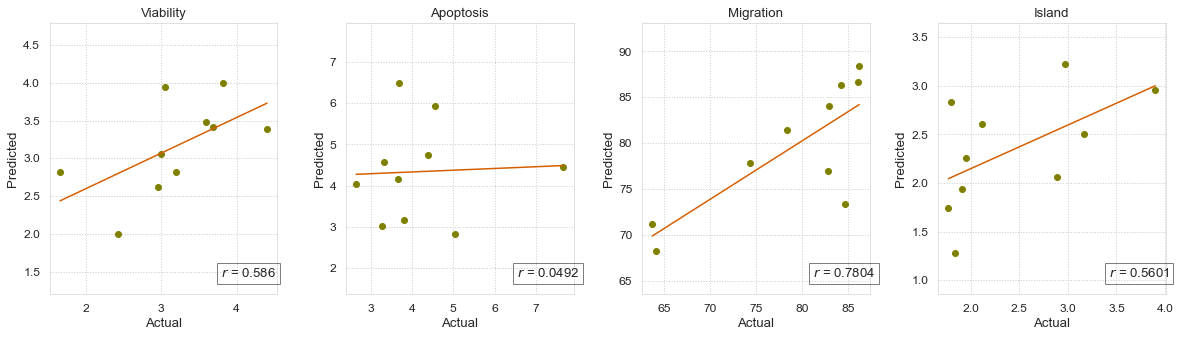

In [38]:
#no clustering
fig, ax = plt.subplots(1, 1, figsize=(7,6))
plotR2YQ2Y(ax, PLSRegression(n_components=2, scale=True), d, y, 5, color="grey")

fig, ax = plt.subplots(1, 4, figsize=(20,5))
fig.subplots_adjust(wspace=0.3, hspace=0.4)
plotActualVsPredicted(ax, PLSRegression(n_components=2), d, y, y_pred="cross-validation", color="grey")

ncl = 5
#k-means
labels = KMeans(n_clusters=ncl).fit(d.T).labels_
x_ = X.copy()
x_["Cluster"] = labels
c_kmeans = x_.groupby("Cluster").mean().T
fig, ax = plt.subplots(1, 1, figsize=(7,6))
plotR2YQ2Y(ax, PLSRegression(n_components=2, scale=True), c_kmeans, y, 5, color="darkred")

fig, ax = plt.subplots(1, 4, figsize=(20,5))
fig.subplots_adjust(wspace=0.3, hspace=0.4)
plotActualVsPredicted(ax, PLSRegression(n_components=2), c_kmeans, y, y_pred="cross-validation", color="darkred")

#pomegranate gmm
gmm = GeneralMixtureModel.from_samples(NormalDistribution, X=d.T, n_components=ncl, n_jobs=-1)
x_ = X.copy()
x_["Cluster"] = gmm.predict(d.T)
c_gmm = x_.groupby("Cluster").mean().T
fig, ax = plt.subplots(1, 1, figsize=(7,6))
plotR2YQ2Y(ax, PLSRegression(n_components=2, scale=True), c_gmm, y, 5, color="olive")

fig, ax = plt.subplots(1, 4, figsize=(20,5))
fig.subplots_adjust(wspace=0.3, hspace=0.4)
plotActualVsPredicted(ax, PLSRegression(n_components=2), c_gmm, y, y_pred="cross-validation", color="olive")

### PAM250:

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(7,6))
size = pam_model.ncl + 1
if pam_model.ncl > 5:
    size = 5
plotR2YQ2Y(ax, PLSRegression(n_components=3, scale=True), pamC, y, size)

fig, ax = plt.subplots(1, 4, figsize=(20,5))
fig.subplots_adjust(wspace=0.3, hspace=0.4)
pam_plsr = PLSRegression(n_components=4, scale=True)
plotActualVsPredicted(ax, pam_plsr, pamC, y, y_pred="cross-validation")

fig, ax = plt.subplots(1, 2, figsize=(14,6))
plotScoresLoadings(ax, pam_plsr.fit(pamC, y), pamC, y, pam_model.ncl, lines, pcX=1, pcY=2)
fig.subplots_adjust(wspace=0.3, hspace=0.4)

fig, ax = plt.subplots(1, 2, figsize=(14,6))
plotScoresLoadings(ax, pam_plsr.fit(pamC, y), pamC, y, pam_model.ncl, lines, pcX=3, pcY=4)
fig.subplots_adjust(wspace=0.3, hspace=0.4)

NameError: name 'pam_model' is not defined